In [ ]:
%pip install transformers tensorflow tf-keras matplotlib pandas seaborn
import pandas as pd
import matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

In [3]:
classifier = pipeline("text-classification", 
                      model = "j-hartmann/emotion-english-distilroberta-base", # specific model !
                      return_all_scores = False) # True

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


### Predict emotion scores for all lines in the data


In [4]:
data = pd.read_csv("../../../../cds-lang-data/GoT-scripts/Game_of_Thrones_Script.csv")

In [6]:
data3 = data.head(40)

for index, row in data3.iterrows():
        if type(row["Sentence"]) == str:
            predicted_emotion = classifier(row["Sentence"])[0]['label']
            data3.loc[index, "predicted_emotion"] = predicted_emotion



/tmp/ipykernel_3874/2001466598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.loc[index, "predicted_emotion"] = predicted_emotion


In [ ]:
data3

In [ ]:
def plot_season(df, outpath):
    plot = sns.catplot(df, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count", 
                palette = emotion_colors.values(), lengend = False, col_wrap = 4)
    plot.set_axis_labels("", "test")
    plt.savefig(outpath)

def plot_emotion(df, outpath):
    sns.catplot(data3, x = "Season", hue = "Season", col = "predicted_emotion", kind = "count",
                palette = "husl", col_wrap = 4)
    plt.savefig(outpath)


In [8]:
# Define a dictionary mapping emotions to colors
emotion_colors = {"disgust": "purple",
                "surprise": "yellow",
                "neutral": "lightgray",
                "fear": "orange",
                "anger": "red",
                "joy": "green",
                "sadness": "blue"}

# Function to specify color based on emotion
#def color_specifier(emotion):
#    return emotion_colors.get(emotion)


In [11]:
total_counts

Season
Season 1    40
Name: predicted_emotion, dtype: int64

In [22]:
def plot_season(df, emotion_colors):
    total_counts = df.groupby('Season')['predicted_emotion'].value_counts(normalize = True) * 100
    plot = sns.catplot(data = df, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count", 
                palette = emotion_colors.values() , col_wrap = 4) #lengend = False
    plot.set_axis_labels("", "Relative Frequency (%)")
    plot.set_titles("{col_name}")
    plt.show()

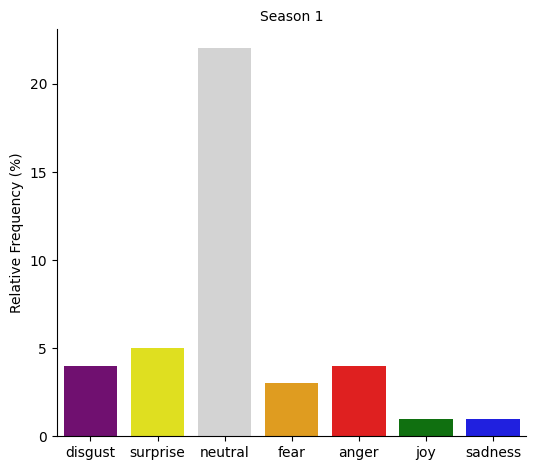

In [23]:
plot_season(data3, emotion_colors)

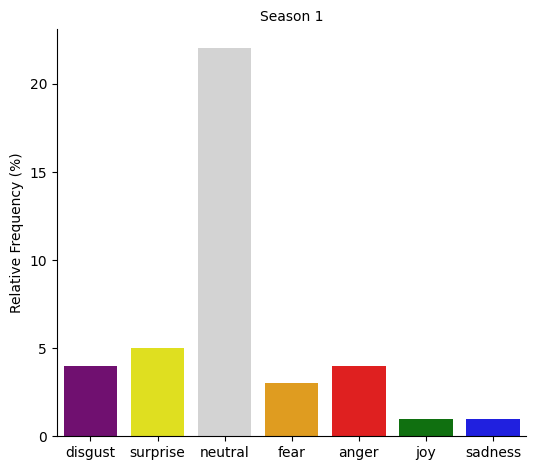

In [18]:
total_counts = data3.groupby('Season')['predicted_emotion'].value_counts(normalize=True) * 100
plot = sns.catplot(data3, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count", 
            palette = emotion_colors.values() , col_wrap = 4) #lengend = False
plot.set_axis_labels("", "Relative Frequency")
plot.set_titles("{col_name}")


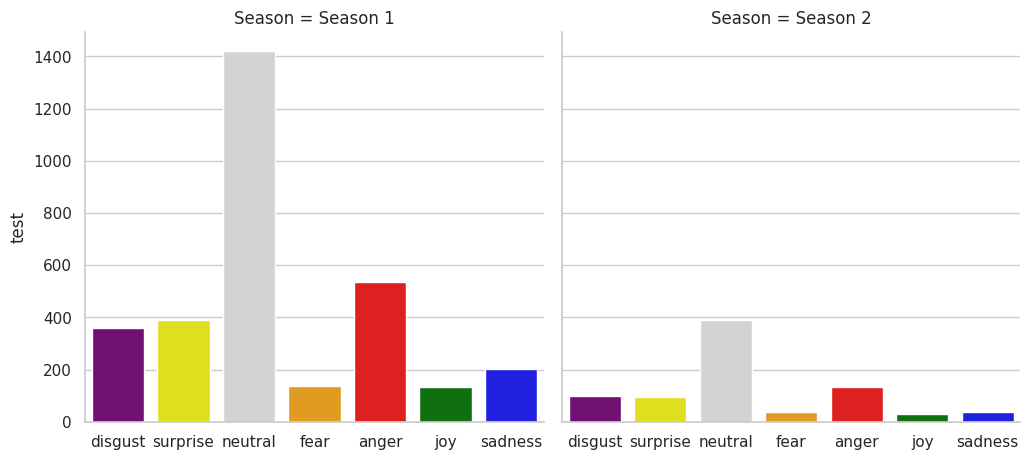

In [49]:
# Apply the color specifier function to the df
#data3["color"] = data3["predicted_emotion"].apply(color_specifier)

plot = sns.catplot(data = data3,
                    x = "predicted_emotion",
                    hue = "color",
                    col = "Season",
                    kind = "count",
                    palette = emotion_colors.values(),
                    legend = False,
                    col_wrap = 4)

plot.set_axis_labels("", "test")
plot.set_axis_labels("", "test")


In [33]:
def plot_emotion(df):
    #total_counts = df.groupby('predicted_emotion')['Season'].value_counts(normalize = True) * 100
    total_counts = df.groupby('Season')['predicted_emotion'].value_counts(normalize = True) * 100
    plot = sns.catplot(data = df, x = "Season", hue = "Season", col = "predicted_emotion", kind = "count",
                    palette = "husl", col_wrap = 4)
    plot.set_axis_labels("", "Relative Frequency")
    plot.set_titles("{col_name}")
    return print("The 'emotion' plot has been saved to the out folder")

The 'emotion' plot has been saved to the out folder


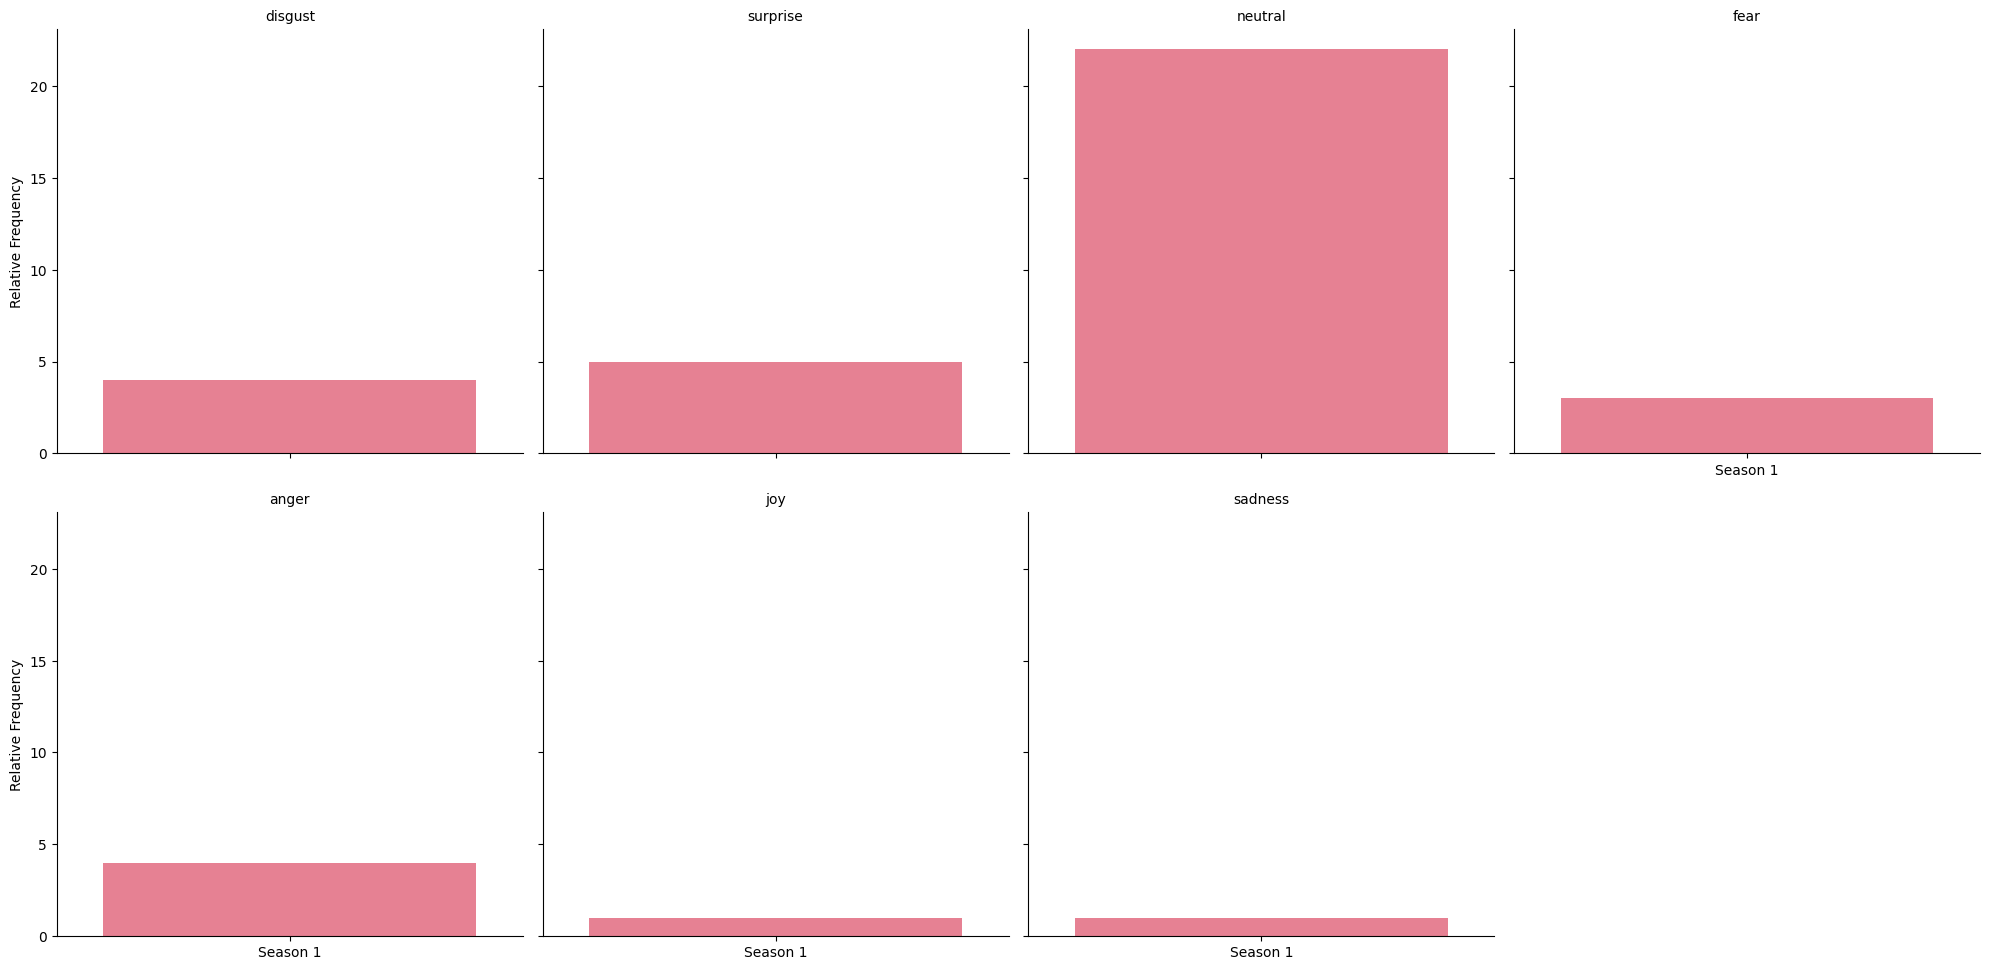

In [34]:
plot_emotion(data3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x800 with 0 Axes>

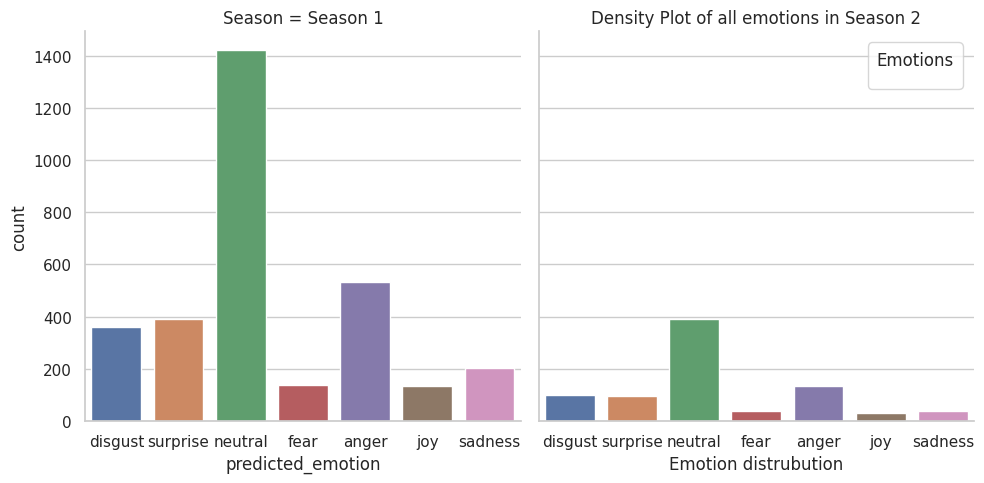

In [18]:
seasons = sorted(data3['Season'].unique())

sns.set(style = "whitegrid")

plt.figure(figsize = (12, 8))

#for season in seasons:
#subset = data3[data3['Season'] == season]
            
sns.catplot(data3, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count")

# Plot formatting
plt.legend(title = 'Emotion', loc = 'upper left')
plt.legend(prop = {'size': 16}, title = 'Emotions')
plt.title(f'Density Plot of all emotions in {season}')
plt.xlabel('Emotion distrubution')
plt.ylabel('Density')


plt.show()